In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white',color_codes=True)
%matplotlib inline

In [2]:
# Read the data
url = 'https://raw.githubusercontent.com/duochen/Python-DataScience/master/Lecture09/Projects/death_data.csv'
dataset = pd.read_csv(url, index_col=0)
dataset.shape

(100798, 10)

In [3]:
# Display the first 5 rows
dataset.head(5)

,year,month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [4]:
# Change index name to 'Index' and change the column names to title
dataset.index.name = 'Index'
dataset.columns = map(str.capitalize, dataset.columns)
dataset.head(5)

,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
Index,,,,,,,,,,
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [5]:
# Organize the data set by year and then by month
dataset_Gun = dataset
dataset_Gun.sort_values(['Year', 'Month'], inplace=True)

In [10]:
# How many males and females are included in this study?
dataset_Gun.Sex.value_counts()

M    86349
F    14449
Name: Sex, dtype: int64

In [11]:
# How many educated females are included in this study?
dataset_byGender = dataset_Gun.groupby('Sex').count()
dataset_byGender

,Year,Month,Intent,Police,Age,Race,Hispanic,Place,Education
Sex,,,,,,,,,
F,14449,14449,14449,14449,14446,14449,14449,14386,14243
M,86349,86349,86348,86349,86334,86349,86349,85028,85133


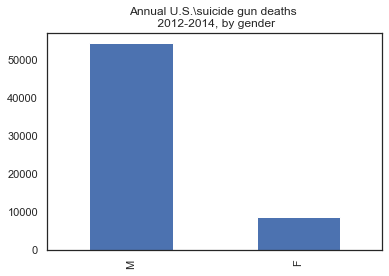

In [13]:
# What is the number of suicide gun deaths in the United States from 2012 to 2014, by gender?
dataset_suicide_Gender =dataset_Gun[
dataset_Gun["Intent"] =="Suicide"]
dataset_suicide_Gender.Sex.value_counts(normalize=False).plot.bar(title='Annual U.S.\\suicide gun deaths \n 2012-2014, by gender')

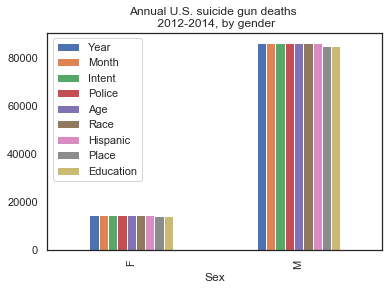

In [14]:
# Plot the bar graph
dataset_byGender.plot.bar(title='Annual U.S. suicide gun deaths \n 2012-2014, by gender')

In [26]:
# What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?
dataset_Gun.Race.value_counts(ascending=False)*100/100000

White                             66.237
Black                             23.296
Hispanic                           9.022
Asian/Pacific Islander             1.326
Native American/Native Alaskan     0.917
Name: Race, dtype: float64

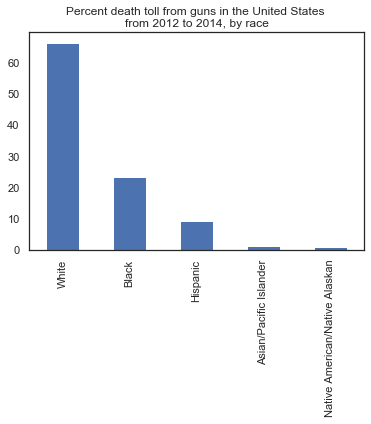

In [27]:
# Plot the data
(dataset_Gun.Race.value_counts(ascending=False)*100/100000).plot.bar(title='Percent death toll from guns in the United States \nfrom 2012 to 2014, by race')

In [28]:
# What is the number of gun deaths in the United States on average from 2012 to 2014, by cause?
dataset_Gun.Intent.value_counts(sort =True,ascending=False)

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: Intent, dtype: int64

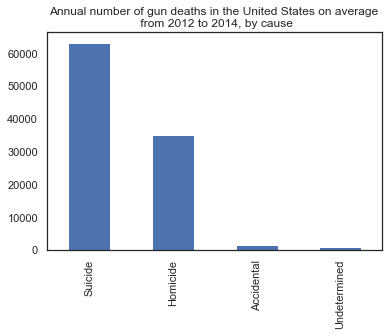

In [29]:
# Plot the data
dataset_Gun.Intent.value_counts(sort=True).plot.bar(title='Annual number of gun deaths in the United States on average \n from 2012 to 2014, by cause')

In [30]:
# What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?
dataset_Gun.Intent.value_counts(ascending=False)*100/100000

Suicide         63.175
Homicide        35.176
Accidental       1.639
Undetermined     0.807
Name: Intent, dtype: float64

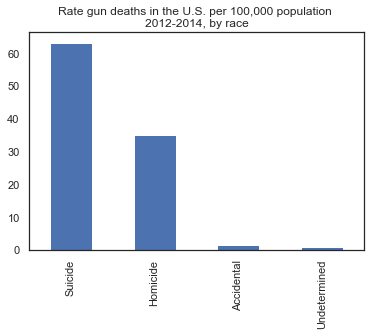

In [31]:
# Plot the data
(dataset_Gun.Intent.value_counts(ascending=False)*100/100000).plot.bar(title='Rate gun deaths in the U.S. per 100,000 population \n2012-2014, by race')